# 1 - Image in spatial and frequency domain

Importanto bibliotecas

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
#from scipy.misc import bytescale
from skimage.util import img_as_ubyte
import matplotlib.image as mpimg

Escolhendo uma imagem da internet e salvando

In [39]:
import requests

# choice img from internet
url = "https://img1.pnghut.com/5/21/8/2gVpqapePN/pokemon-gastly-pok-c3-a9-ball-clefable-cartoon.jpg"

# download and save image
response = requests.get(url)
if response.status_code == 200:
    with open("figure.jpg", 'wb') as f:
        f.write(response.content)

Lendo imagem

In [40]:
# loading image
img = mpimg.imread('figure.jpg')

choosen_y_x = 150
resolution = 512

# 128 x 128 slice (power of 2)
img_slice = img[choosen_y_x:(choosen_y_x + resolution), choosen_y_x:(choosen_y_x + resolution), 2]

## DCT freq and Inversed DCT image

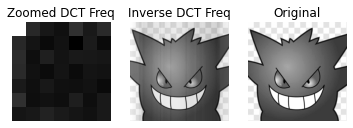

In [41]:
# transform: 2D DCT
dct_slice = fftpack.dct(fftpack.dct(img_slice.T, ).T, norm='ortho')
# inverse transform: 2D DCT
idct_slice = fftpack.idct(fftpack.idct(dct_slice.T, norm='ortho').T, norm='ortho')

f, (plt1, plt2, plt3) = plt.subplots(1, 3)

plt1.axis('off'); plt1.set_title('Zoomed DCT Freq'); plt1.imshow(dct_slice[0:7,0:7], cmap='gray', interpolation='nearest');
plt2.axis('off'); plt2.set_title('Inverse DCT Freq'); plt2.imshow(idct_slice, cmap='gray');
plt3.axis('off'); plt3.set_title('Original'); plt3.imshow(img_slice, cmap='gray');

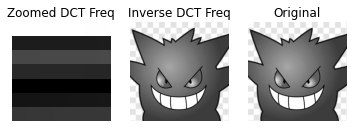

In [42]:
dct_slice = fftpack.dct(img_slice, axis=0, norm='ortho')
# inverse transform: 2D DCT
idct_slice = fftpack.idct(dct_slice, axis=0, norm='ortho')

f, (plt1, plt2, plt3) = plt.subplots(1, 3)

plt1.axis('off'); plt1.set_title('Zoomed DCT Freq'); plt1.imshow(dct_slice[0:7,0:7], cmap='gray', interpolation='nearest');
plt2.axis('off'); plt2.set_title('Inverse DCT Freq'); plt2.imshow(idct_slice, cmap='gray');
plt3.axis('off'); plt3.set_title('Original'); plt3.imshow(img_slice, cmap='gray');

##DCT Basis Functions

Para encontrar as funções bases basta aplicar a DCT em uma matriz identidade, e printar o resultado.
Para um bloco de tamanho 8x8 teremos a seguinte Função-Base:

In [43]:
base = fftpack.dct(fftpack.dct(np.eye(8), axis=0), axis=0, norm='ortho')
print(base)

[[ 3.94324121 -0.81195594  1.01500526 -0.07725266  0.64370716  0.16457517
   0.46080264  0.31873142]
 [ 1.51563074  3.84259195 -0.51533179  1.20157057  0.09391997  0.79123117
   0.35644855  0.56022108]
 [-0.36172378  1.43764093  3.88941591 -0.15867446  1.11408412  0.26490612
   0.7166811   0.48870632]
 [ 0.12224943 -0.6707734   0.9307011   3.95737107  0.15420234  1.05768364
   0.4368772   0.66344553]
 [-0.07725266  0.16457517 -0.81195594  0.31873142  3.94324121  0.46080264
   1.01500526  0.64370716]
 [ 0.03583186 -0.16566641  0.11458938 -0.85853585 -0.31733975  3.83536591
   0.78974325  1.01057347]
 [-0.02429391  0.04813337 -0.19334539  0.03730043 -0.81312967 -0.91430521
   3.67264316  1.24846467]
 [ 0.00900726 -0.04023844  0.02551885 -0.1556663  -0.02868377 -0.63219741
  -1.34680141  3.72978379]]


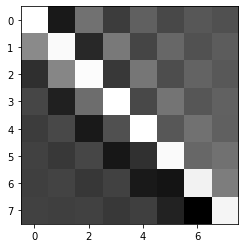

In [44]:
plt.imshow(base, cmap='gray', interpolation='nearest')

In [45]:
base = fftpack.dct(np.eye(8), axis=0, norm='ortho')

print(base)

[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.49039264  0.41573481  0.27778512  0.09754516 -0.09754516 -0.27778512
  -0.41573481 -0.49039264]
 [ 0.46193977  0.19134172 -0.19134172 -0.46193977 -0.46193977 -0.19134172
   0.19134172  0.46193977]
 [ 0.41573481 -0.09754516 -0.49039264 -0.27778512  0.27778512  0.49039264
   0.09754516 -0.41573481]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.27778512 -0.49039264  0.09754516  0.41573481 -0.41573481 -0.09754516
   0.49039264 -0.27778512]
 [ 0.19134172 -0.46193977  0.46193977 -0.19134172 -0.19134172  0.46193977
  -0.46193977  0.19134172]
 [ 0.09754516 -0.27778512  0.41573481 -0.49039264  0.49039264 -0.41573481
   0.27778512 -0.09754516]]


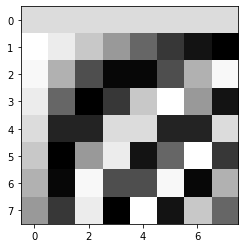

In [46]:
plt.imshow(base, cmap='gray', interpolation='nearest')

Testando, por motivo de exemplo, a resolução completa da imagem (ineficiente, normalmente dividi-se a imagem em blocos de tamanho 8x8 para poder aplicar a transformação):

In [47]:
base = fftpack.dct(np.eye(512), axis=0, norm='ortho')

print(base)

[[ 0.04419417  0.04419417  0.04419417 ...  0.04419417  0.04419417
   0.04419417]
 [ 0.06249971  0.06249735  0.06249265 ... -0.06249265 -0.06249735
  -0.06249971]
 [ 0.06249882  0.06248941  0.06247059 ...  0.06247059  0.06248941
   0.06249882]
 ...
 [ 0.00057523 -0.00172551  0.0028752  ... -0.0028752   0.00172551
  -0.00057523]
 [ 0.00038349 -0.00115042  0.00191718 ...  0.00191718 -0.00115042
   0.00038349]
 [ 0.00019175 -0.00057523  0.0009587  ... -0.0009587   0.00057523
  -0.00019175]]


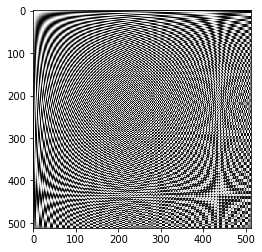

In [48]:
plt.imshow(base, cmap='gray', interpolation='nearest')

In [49]:
base = fftpack.dct(fftpack.dct(np.eye(512), axis=0), axis=0, norm='ortho')
print(base)

[[ 2.88542937e+01 -9.55911207e+00  5.80610561e+00 ...  4.38552021e-02
   4.43975543e-02  4.41263808e-02]
 [ 1.35603566e+01  2.45584882e+01 -9.62626263e+00 ...  6.29796748e-02
   6.22126694e-02  6.25961685e-02]
 [-2.72039183e+00  1.73809814e+01  2.28083938e+01 ...  6.20217893e-02
   6.27888055e-02  6.24053009e-02]
 ...
 [ 8.81120684e-07 -2.65962322e-06  4.37861124e-06 ...  2.23937133e+01
   9.01248091e+00  6.99543045e+00]
 [-5.89195615e-07  1.75676864e-06 -2.96408292e-06 ... -1.79688122e+01
   2.33890547e+01  1.08483618e+01]
 [ 2.93688466e-07 -8.86485443e-07  1.45944549e-06 ... -3.90996436e+00
  -1.62222621e+01  2.72041103e+01]]


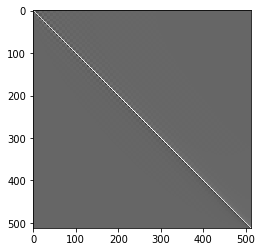

In [50]:
plt.imshow(base, cmap='gray', interpolation='nearest')